<a href="https://colab.research.google.com/github/ivan-mihailov/LS-Unit-2-Sprint-1-Assignments/blob/main/DS_Sprint_Challenge_21_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1*

---

👇 **Do not change the code in this cell.** If you're working in Google Colab, you can run this cell to install `category_encoders`.

In [1]:
%%capture
# If you're in Colab...
import sys
if 'google.colab' in sys.modules:
    !pip install category_encoders==2.*

 
# Sprint Challenge: Predicting Home Prices in Iowa 🏠

The goal of this assignment is to build a regression model that can predict the sale price of a house in Aimes, Iowa.

# Directions 

This notebook contains 12 tasks, which cover the material we've learned in this sprint. Here's a summary:

- **Task 1:** Import training data.
- **Task 2 (`stretch goal`):** Create scatter plot.
- **Task 3:** Split data into feature matrix and target vector.
- **Task 4:** Split data into training and validation sets.
- **Task 5:** Establish baseline mean absolute error.
- **Task 6:** Build and train linear regression model.
- **Task 7:** Build and train ridge regression model.
- **Task 8:** Calculate mean absolute error for training and validation sets.
- **Task 9:** Calculate $R^2$ for validation set.
- **Task 10:** Make predictions based on test set.
- **Task 11 (`stretch goal`):** Get below 18,000 for test set MAE. 
- **Task 12 (`stretch goal`):** Plot model coefficients.

For each task you should do the following:

- Read the task instructions.
- Write your code in the cell below the task. Delete the `raise NotImplementedError` before your start.
- Run the testing cell below the task. If you get an error, read the error message and re-evaluate your code.

**You should limit your code to the following libraries:**

- `category_encoders`
- `numpy`
- `matplotlib`
- `pandas`
- `sklearn` 

# Tasks

## I. Wrangle Data

**Task 1:** Since real estate prices fluctuate over time, it's important to index the houses in this dataset using the year in which they were sold. First, load the dataset into a DataFrame named `df` and find the column that states the year sold. Next, modify the code below so that `Yr_Sold` column is parsed as a datetime object and set as the index.

In [2]:
'''T1: Import data into DataFrame `df`.'''
import pandas as pd

url_train = 'https://drive.google.com/uc?export=download&id=1tmYLQ1RwIgjI_d66PWnlXU-5D_VxtiQc'
df = pd.read_csv(url_train)
# YOUR CODE HERE
df['Yr_Sold'] = pd.to_datetime(df['Yr_Sold']) # Transform 'Yr_Sold' column to DateTime format
df = df.set_index('Yr_Sold') # Set 'Yr_Sold' column as index for the DataFrame
df.head()

,1st_Flr_SF,Bedroom_AbvGr,Bldg_Type,Bsmt_Full_Bath,Bsmt_Half_Bath,Central_Air,Condition_1,Condition_2,Electrical,Exter_Cond,Exter_Qual,Exterior_1st,Exterior_2nd,Foundation,Full_Bath,Functional,Gr_Liv_Area,Half_Bath,Heating,Heating_QC,House_Style,Kitchen_AbvGr,Kitchen_Qual,Land_Contour,Land_Slope,Lot_Area,Lot_Config,Lot_Shape,MS_SubClass,MS_Zoning,Mas_Vnr_Type,Mo_Sold,Neighborhood,Overall_Cond,Overall_Qual,Paved_Drive,Roof_Matl,Roof_Style,SalePrice,Sale_Condition,Sale_Type,Street,TotRms_AbvGrd,Utilities,Year_Built,Year_Remod/Add
Yr_Sold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-01,882,2,1Fam,0.0,0.0,Y,Norm,Norm,SBrkr,TA,TA,MetalSd,MetalSd,CBlock,1,Typ,882,0,GasA,TA,1Story,1,TA,Lvl,Gtl,13008,Inside,IR1,20,RL,None,10,NAmes,5,6,Y,CompShg,Gable,124500,Normal,WD,Pave,5,AllPub,1956,1956
2009-01-01,1434,4,1Fam,1.0,0.0,Y,Norm,Norm,SBrkr,TA,TA,Plywood,Plywood,CBlock,2,Typ,1434,0,GasA,TA,1Story,1,TA,Lvl,Gtl,10200,Inside,Reg,20,RL,BrkFace,6,NAmes,5,6,Y,CompShg,Hip,157000,Normal,WD,Pave,7,AllPub,1974,1974
2009-01-01,2000,4,1Fam,1.0,0.0,Y,Norm,Norm,SBrkr,TA,Gd,Plywood,Wd Sdng,CBlock,2,Typ,2704,1,GasA,Gd,SLvl,1,Ex,Lvl,Gtl,13860,Inside,Reg,80,RL,None,7,NAmes,7,8,Y,CompShg,Gable,345000,Normal,WD,Pave,9,AllPub,1972,1995
2009-01-01,945,3,1Fam,0.0,0.0,Y,Norm,Norm,SBrkr,TA,TA,VinylSd,VinylSd,PConc,2,Typ,1608,1,GasA,Ex,2Story,1,TA,Lvl,Gtl,10179,Corner,IR1,60,RL,None,7,Gilbert,5,6,Y,CompShg,Gable,189500,Normal,WD,Pave,7,AllPub,1997,1997
2009-01-01,1008,4,1Fam,0.0,0.0,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,PConc,2,Typ,2283,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11792,Inside,IR1,60,RL,BrkFace,8,Gilbert,5,8,Y,CompShg,Gable,270000,Normal,WD,Pave,9,AllPub,2003,2003


In [4]:
df.isna().sum().sum() # Check to ensure there are no NaNs

0

**Task 1 Testing**

In [5]:
'''T1 Testing.'''
assert isinstance(df, pd.DataFrame), '`df` is not a DataFrame. Did you import the data?'
assert len(df) == 2564, 'DataFrame `df` has the wrong number of rows.'
assert isinstance(df.index, pd.DatetimeIndex), '`df` does not have a datetime index.'

**Task 2 (`stretch goal`):** Create a scatter plot that shows `'SalePrice'` as a function of `'Gr_Liv_Area'`. Be sure to label the axes of your plot.

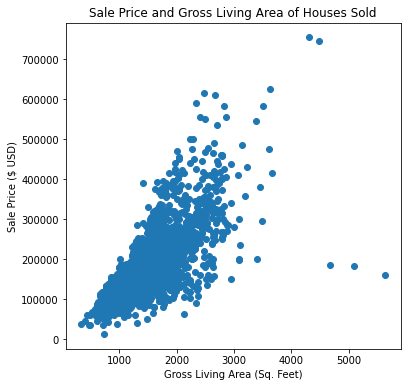

In [6]:
import matplotlib.pyplot as plt

# YOUR CODE HERE
plt.figure(figsize=[6, 6]) # Set the size of the scatterplot

plt.scatter(x = df['Gr_Liv_Area'], y = df['SalePrice']) # Create scatterplot showing relationship between Gross Living Area and the Sale Price of the Houses Sold
plt.xlabel('Gross Living Area (Sq. Feet)') # Set the x-axis label
plt.ylabel('Sale Price ($ USD)') # Set the y-axis label
plt.title('Sale Price and Gross Living Area of Houses Sold') # Set the chart title
plt.show()

## II. Split Data

**Task 3:** Since you're building a model to predict the price at which a house will be sold, your target is the `'SalePrice'` column. Split the DataFrame `df` into the target vector `y` and the feature matrix `X`. 

In [7]:
'''T3: Split `df` into `X` and `y`.'''

target = 'SalePrice'
# YOUR CODE HERE
features = ['1st_Flr_SF', 'Bedroom_AbvGr', 'Bldg_Type', 'Bsmt_Full_Bath',	
            'Bsmt_Half_Bath',	'Central_Air', 'Condition_1', 'Condition_2',
            'Electrical',	'Exter_Cond',	'Exter_Qual',	'Exterior_1st',
            'Exterior_2nd',	'Foundation',	'Full_Bath',	'Functional',
            'Gr_Liv_Area',	'Half_Bath',	'Heating',	'Heating_QC',	'House_Style',
            'Kitchen_AbvGr',	'Kitchen_Qual',	'Land_Contour',	'Land_Slope',
            'Lot_Area',	'Lot_Config',	'Lot_Shape',	'MS_SubClass',	'MS_Zoning',
            'Mas_Vnr_Type',	'Mo_Sold',	'Neighborhood',	'Overall_Cond',
            'Overall_Qual',	'Paved_Drive',	'Roof_Matl',	'Roof_Style',
            'Sale_Condition',	'Sale_Type',	'Street',	'TotRms_AbvGrd',
            'Utilities',	'Year_Built',	'Year_Remod/Add'] # Set up all columns as features (except Target column and Index)
X = df[features]
y = df[target]

**Task 3 Testing**

In [8]:
'''T3 Tests'''
assert y.shape == (2564,), '`y` either has the wrong number of rows, or is two-dimentional.'
assert X.shape == (2564, 45), '`X` has the wrong number of columns or rows.'
assert 'SalePrice' not in X.columns, 'Target is still part of feature matrix.' 

**Task 4:** Split `X` and `y` into training, validation, and test sets. Since housing prices fluctuate over time, you should use the time-based cutoff method. 

- Training: Homes sold before 2009
- Validation: Homes sold during 2009

In [9]:
'''T4: Split `X` and `y` into training, validation, and testing sets.'''

# YOUR CODE HERE
cutoff = '2009-01-01'
X_train = X[X.index < cutoff]
y_train = y[y.index < cutoff]
X_val = X[X.index >= cutoff]
y_val = y[y.index >= cutoff]

**Task 4 Testing**

In [10]:
'''T4 Tests'''
assert len(X_train) == len(y_train) == 1920, 'Your training set has the wrong number of rows.'
assert len(X_val) == len(y_val) == 644, 'Your validation set has the wrong number of rows.'

## III. Set Baseline

**Task 5:** Before you can create a model to predict sale price, you need to establish a baseline. First, calculate the mean housing price for your training set. Next, calculate the *mean absolute error* for a model that always predicts that mean. Be sure to assign the mean absolute error to a variable named `baseline_mae`.

In [11]:
'''T5: Calculate baseline mean absolute error.'''
from sklearn.metrics import mean_absolute_error

# YOUR CODE HERE
y_guess = y_train.mean()
y_mean = [y_guess] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_mean)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 58502.9394639757


**Task 5 Testing**

In [12]:
'''T5 Tests'''
assert isinstance(baseline_mae, float), '`baseline_mae` is not a `float`. Have you assigned a value to this variable name?'

In [13]:
df.describe()

,1st_Flr_SF,Bedroom_AbvGr,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Gr_Liv_Area,Half_Bath,Kitchen_AbvGr,Lot_Area,MS_SubClass,Mo_Sold,Overall_Cond,Overall_Qual,SalePrice,TotRms_AbvGrd,Year_Built,Year_Remod/Add
count,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000
mean,1161.531981,2.858034,0.425897,0.063963,1.567473,1503.733229,0.376755,1.042902,10181.487910,57.264041,6.465289,5.565523,6.107644,181433.289392,6.455538,1971.328003,1984.138846
std,390.569956,0.826862,0.525183,0.251030,0.550007,509.259173,0.501288,0.212082,8144.661487,42.366737,2.726434,1.104736,1.417836,80410.055316,1.564572,30.277615,20.868058
min,334.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,1300.000000,20.000000,1.000000,1.000000,1.000000,13100.000000,2.000000,1872.000000,1950.000000
25%,880.000000,2.000000,0.000000,0.000000,1.000000,1128.000000,0.000000,1.000000,7433.250000,20.000000,5.000000,5.000000,5.000000,129887.500000,5.000000,1953.000000,1965.000000
50%,1088.000000,3.000000,0.000000,0.000000,2.000000,1445.500000,0.000000,1.000000,9429.000000,50.000000,6.000000,5.000000,6.000000,160350.000000,6.000000,1973.000000,1993.000000
75%,1390.000000,3.000000,1.000000,0.000000,2.000000,1749.250000,1.000000,1.000000,11577.250000,70.000000,8.000000,6.000000,7.000000,214000.000000,7.000000,2001.000000,2004.000000
max,5095.000000,8.000000,3.000000,2.000000,4.000000,5642.000000,2.000000,3.000000,215245.000000,190.000000,12.000000,9.000000,10.000000,755000.000000,15.000000,2009.000000,2009.000000


In [14]:
df.describe(exclude='number')

,Bldg_Type,Central_Air,Condition_1,Condition_2,Electrical,Exter_Cond,Exter_Qual,Exterior_1st,Exterior_2nd,Foundation,Functional,Heating,Heating_QC,House_Style,Kitchen_Qual,Land_Contour,Land_Slope,Lot_Config,Lot_Shape,MS_Zoning,Mas_Vnr_Type,Neighborhood,Paved_Drive,Roof_Matl,Roof_Style,Sale_Condition,Sale_Type,Street,Utilities
count,2564,2564,2564,2564,2564,2564,2564,2564,2564,2564,2564,2564,2564,2564,2564,2564,2564,2564,2564,2564,2564,2564,2564,2564,2564,2564,2564,2564,2564
unique,5,2,9,8,5,5,4,16,17,6,8,6,5,8,4,4,3,5,4,7,5,28,3,8,6,6,10,2,3
top,1Fam,Y,Norm,Norm,SBrkr,TA,TA,VinylSd,VinylSd,PConc,Typ,GasA,Ex,1Story,TA,Lvl,Gtl,Inside,Reg,RL,None,NAmes,Y,CompShg,Gable,Normal,WD,Pave,AllPub
freq,2130,2394,2209,2536,2340,2243,1574,897,889,1149,2385,2523,1309,1289,1315,2298,2446,1883,1617,2003,1530,385,2320,2525,2022,2100,2218,2555,2561


## IV. Build Models

**Task 6:** Build and train a linear regression model named `model_lr` that predicts home sale price. Your model should have the following components:

- A `OneHotEncoder` for categorical features.
- A `StandardScaler` so that you can compare your model coefficients after training.
- A `pipeline` that combines transformers and predictor.

**Tip:** For your `OneHotEncoder`, `use_cat_names` should be set to `True`.

In [15]:
'''T6: Build and train LinearRegression model.'''
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# YOUR CODE HERE
features_1 = ['1st_Flr_SF', 'Bedroom_AbvGr', 'Bldg_Type', 'Bsmt_Full_Bath',	
            'Bsmt_Half_Bath',	'Central_Air', 'Full_Bath',	'Gr_Liv_Area',	
            'Half_Bath', 'House_Style', 'Kitchen_AbvGr',	'Kitchen_Qual',	
            'Lot_Area',	'MS_SubClass',	'MS_Zoning', 'Mo_Sold',	'Overall_Cond',
            'Overall_Qual',	'Paved_Drive', 'Sale_Condition',	'TotRms_AbvGrd',
            'Year_Built',	'Year_Remod/Add'] # Set up all potentially relevant columns as features (except high-cardinality, target, and Index columns)
X = df[features_1]
X_train = X[X.index < cutoff]
X_val = X[X.index >= cutoff]

# Create Pipeline using OneHotEncoder and StandardScaler as transformers and Linear Regression as predictor
model_lr = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    StandardScaler(),
    LinearRegression()
)
model_lr.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


**Task 6 Testing**

In [16]:
'''T6 Tests'''
from sklearn.pipeline import Pipeline
assert isinstance(model_lr, Pipeline), '`model_lr` is not a pipeline.'
assert len(model_lr.named_steps) > 1, 'Your `model_lr` pipeline is missing components.'

**Task 7:** Build and train a ridge regression model named `model_r` that predicts home sales price. Your model should include the following components:

- A `OneHotEncoder` for categorical features.
- A `StandardScaler` so that you can compare your model coefficients after training.
- A `pipeline` that combines transformers and predictor.

**Tip:** If you combine a `StandardScaler` transformer with a `Ridge` predictor, you should set the `normalize` argument for the latter to `False`.

In [17]:
'''T7. Build and train Ridge model.'''
from sklearn.linear_model import Ridge

# YOUR CODE HERE
# Create Pipeline using OneHotEncoder and StandardScaler as transformers and Ridge Regression as predictor
model_r = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    StandardScaler(),
    Ridge(alpha = 10, normalize = False)
)

model_r.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['Bldg_Type', 'Central_Air', 'House_Style',
                                     'Kitchen_Qual', 'MS_Zoning', 'Paved_Drive',
                                     'Sale_Condition'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='auto',
                       tol=0.001))],
         verbose=False)

**Task 7 Testing**

In [18]:
assert isinstance(model_r, Pipeline), '`model_r` is not a pipeline.'
assert len(model_r.named_steps) > 1, 'Your `model_r` pipeline is missing components.'

## V. Check Metrics

**Task 8:** Compare your models by calculating their mean absolute error for the training and validation sets. You should assign these to the variables `model_lr_training_mae`, `model_lr_validation_mae`, `model_r_training_mae`, and `model_r_validation_mae`, respectively. The validation MAE for both your models should be lower than your `baseline_mae`.

In [19]:
'''T8: Compare model metrics, MAE.'''
# YOUR CODE HERE

y_pred_train_lr = model_lr.predict(X_train) # Calculate y_pred for training data using linear regression model
y_pred_val_lr = model_lr.predict(X_val) # Calculate y_pred for validation data using linear regression model

y_pred_train_r = model_r.predict(X_train) # Calculate y_pred for training data using ridge regression model
y_pred_val_r = model_r.predict(X_val) # Calculate y_pred for validation data using ridge regression model

model_lr_training_mae = mean_absolute_error(y_train, y_pred_train_lr) # Calculate MAE for training data using linear regression model
model_lr_validation_mae = mean_absolute_error(y_val, y_pred_val_lr) # Calculate MAE for valiudation data using linear regression model

model_r_training_mae = mean_absolute_error(y_train, y_pred_train_r) # Calculate MAE for training data using ridge regression model
model_r_validation_mae = mean_absolute_error(y_val, y_pred_val_r) # Calculate MAE for training data using ridge regression model

print('Linear Regression Model')
print('Training MAE:', model_lr_training_mae)
print('Validation MAE:', model_lr_validation_mae)
print()
print('Ridge Regression Model')
print('Training MAE:', model_r_training_mae)
print('Validation MAE:', model_r_validation_mae)

Linear Regression Model
Training MAE: 21339.353783698603
Validation MAE: 21200.925281307187

Ridge Regression Model
Training MAE: 20281.825089573824
Validation MAE: 20243.171059366232


**Task 8 Testing**

In [20]:
'''T8 Tests'''
assert isinstance(model_lr_training_mae, float), '`model_lr_training_mae` is not a float. Did you assign a value to this variable?'
assert isinstance(model_lr_validation_mae, float), '`model_lr_validation_mae` is not a float. Did you assign a value to this variable?'
assert isinstance(model_r_training_mae, float), '`model_r_training_mae` is not a float. Did you assign a value to this variable?'
assert isinstance(model_r_validation_mae, float), '`model_r_validation_mae` is not a float. Did you assign a value to this variable?'

**Task 9:** Compare your two models by calculating their $R^2$ score for the **validation data**.

In [21]:
'''T9: Compare model metrics, R^2.'''
# YOUR CODE HERE
from sklearn.metrics import r2_score

model_lr_r2_score = r2_score(y_val, y_pred_val_lr) # Calculate R^2 Score for validation data using linear regression model

model_r_r2_score = r2_score(y_val, y_pred_val_r) # Calculate R^2 Score for validation data using ridge regression model

print('Linear Regression R^2:', model_lr_r2_score)
print('Ridge Regression R^2:', model_r_r2_score)

Linear Regression R^2: 0.854813050267718
Ridge Regression R^2: 0.868296372797339


**Task 9 Testing**

In [22]:
'''T9 Tests'''
assert isinstance(model_lr_r2_score, float), '`model_lr_r2_score` is not a float. Did you assign a value to this variable?'
assert isinstance(model_r_r2_score, float), '`model_r_r2_score` is not a float. Did you assign a value to this variable?'
assert model_lr_r2_score <= 1, 'The maximum value for an R^2 score is 1.'
assert model_r_r2_score <= 1, 'The maximum value for an R^2 score is 1.'

**Task 10:** Based on the metrics above, choose the best of your two models and generate an array of predictions `y_pred` using the test set below.

**Note:** Make sure that you import and clean the test set *exactly the same way* you did with the training set at the start of this notebook.

In [23]:
url_test = 'https://drive.google.com/uc?export=download&id=1y9u8cOWprTjruw8E-ct1c7YaEytToqd_'
X_test = pd.read_csv(url_test)

# YOUR CODE HERE
X_test['Yr_Sold'] = pd.to_datetime(X_test['Yr_Sold']) # Transform 'Yr_Sold' column to DateTime format
X_test = X_test.set_index('Yr_Sold') # Set 'Yr_Sold' column as index for the DataFrame
X_test = X_test[features_1] # Isolate the same features in testing date as those selected for the training and validation data

y_pred = model_r.predict(X_test) # Calculate y_pred for testing data using ridge regression model
print('My predictions:', y_pred[:3])

My predictions: [197592.51075328 112690.37911651 166750.98174025]


**Evaluate Features Using KBest Function**

In [24]:
from sklearn.feature_selection import SelectKBest, f_regression

ohe = OneHotEncoder(use_cat_names = True)

X_train_ohe = ohe.fit_transform(X_train) # Use OneHotEncoder to transform training data outside of pipeline

scale = StandardScaler()

X_train_scaled = scale.fit_transform(X_train_ohe) # Use StandardScaler to scale OneHotEncoded training data outsideof pipeline

selector = SelectKBest(score_func = f_regression, k = 30) # Set up KBest to calculate the top 30 features in the training data

X_train_KBest = selector.fit_transform(X_train_scaled, y_train)

X_train_KBest.shape

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


(1920, 30)

In [25]:
selected_mask = selector.get_support() # Use get_support method to get a mask of the features selected by KBest

all_names = X_train_ohe.columns # Assign all column names in the OneHotEncoded training dataset
KBest_features = all_names[selected_mask] # Assign the names of the features selected by KBest
not_KBest_features = all_names[~selected_mask] # Assign the names of the features not selected by KBest

print('Features Selected by KBest:') 
for name in KBest_features: # Loop through and print the names of the features selected by KBest
  print('\n', name, '\n' )

print('Features Not Selected by KBest:')
for name in not_KBest_features: # Loop through and print the names of the features not selected by KBest
  print('\n', name, '\n' )

Features Selected by KBest:

 1st_Flr_SF 


 Bedroom_AbvGr 


 Bldg_Type_Duplex 


 Bldg_Type_Twnhs 


 Bsmt_Full_Bath 


 Central_Air_Y 


 Central_Air_N 


 Full_Bath 


 Gr_Liv_Area 


 Half_Bath 


 House_Style_2Story 


 House_Style_1.5Fin 


 Kitchen_AbvGr 


 Kitchen_Qual_TA 


 Kitchen_Qual_Gd 


 Kitchen_Qual_Ex 


 Kitchen_Qual_Fa 


 Lot_Area 


 MS_Zoning_RL 


 MS_Zoning_RM 


 Overall_Cond 


 Overall_Qual 


 Paved_Drive_Y 


 Paved_Drive_N 


 Sale_Condition_Normal 


 Sale_Condition_Abnorml 


 Sale_Condition_Partial 


 TotRms_AbvGrd 


 Year_Built 


 Year_Remod/Add 

Features Not Selected by KBest:

 Bldg_Type_1Fam 


 Bldg_Type_TwnhsE 


 Bldg_Type_2fmCon 


 Bsmt_Half_Bath 


 House_Style_1Story 


 House_Style_SLvl 


 House_Style_2.5Unf 


 House_Style_SFoyer 


 House_Style_1.5Unf 


 House_Style_2.5Fin 


 MS_SubClass 


 MS_Zoning_RH 


 MS_Zoning_FV 


 MS_Zoning_A (agr) 


 MS_Zoning_C (all) 


 MS_Zoning_I (all) 


 Mo_Sold 


 Paved_Drive_P 


 Sale_Condi

**Task 10 Testing:** There is a hidden test in the cell below. When you submit your notebook to Canvas, your test MAE will be calculated. In order to get the point for this task, your test MAE must be below 58,000.

**Tip:** Use your validation MAE to estimate what your test MAE will be.

In [26]:
import numpy as np
assert isinstance(y_pred, np.ndarray), '`y_pred` should be type `ndarray`.'
assert y_pred.shape == (340,), '`y_pred` should be a 1-dimentional array with 340 predictions.'
# Your test MAE will be printed out below when you submit your assignment.

**Task 11 (`stretch goal`):** There's no code to write for this task. Below is another testing cell that will calculate the MAE for your test set. In order to get the point for this task, your test MAE must be below 18,000.

**Tip:** Are there any **hyperparameters** in your model that you could adjust to improve performance? 

In [27]:
assert isinstance(y_pred, np.ndarray), '`y_pred` should be type `ndarray`.'
assert y_pred.shape == (340,), '`y_pred` should be a 1-dimentional array with 340 predictions.'
# Your test MAE will be printed out below when you submit your assignment.

## VI. Explain Model

**Task 12 (`stretch goal`):** Create a horizontal barchart for your best performing model that shows the ten most important features for the model's predictions. Don't forget to label your axes!

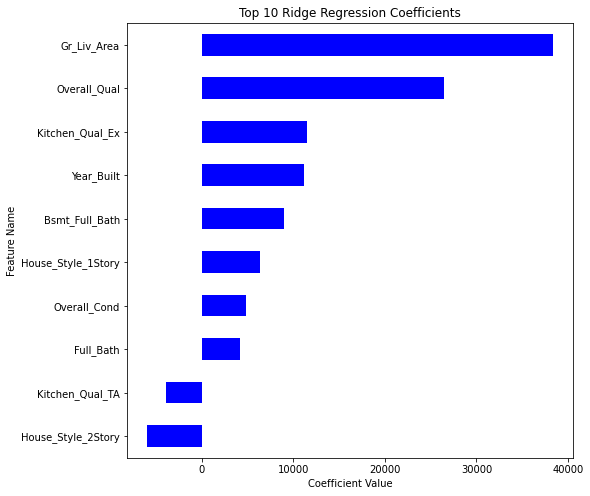

In [50]:
# YOUR CODE HERE

coefficients = pd.Series(model_r.steps[2][1].coef_, X_train_ohe.columns) # Create a pandas series using the ridge regression coefficients and the column names used in the model
coef_top_8 = coefficients.nlargest(8) # Isolate Top 8 features (by coefficient size)
coef_bot_2 = coefficients.nsmallest(2) # Isolate Bottom 2 features (by coefficient size)
coef_top_10 = coef_top_8.append(coef_bot_2) # Append the Bottom 2 features to the Top 8 features (by coefficient size)

plt.figure(figsize = [8, 8])

coef_top_10.sort_values().plot.barh(color = 'blue') # Set up horizontal bar chart of the Ridge Regression Coefficients
plt.xlabel('Coefficient Value') # Set up name for y-axis
plt.ylabel('Feature Name') # Set up name for y-axis
plt.title('Top 10 Ridge Regression Coefficients') # Set up table name
plt.show()